# Health Insurance Cross Sell



## Background Information 

- an Insurance company that provide Health Insurance to its customers, usually they offer other insurance product to the customers through diffirent kind of marketing channel. In this case we will build a model to predict   whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.


## Problem Statement

- Un optimize customer reachout process, many insurance worker spend a lot of their time having meeting with prospective client without knowing the probabily of that customer to buy the insurance product


## Business Question

- How does age of a vehicle determing the response of vehicle insurance advertisment
- How to attract customers from different generation 
- what's the major factor that make a health insurance customer not intersted with vehicle insurance 
- What's the best machine Learning modeling for this Cross Sell case


## Business Goals

- Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue



## Columns Description

![title](description.png)


In [7]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import sidetable as stb

### Getting The Basic Understanding of the Data 

In [3]:
df = pd.read_csv('train.csv')
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [5]:
df.info()

# we can see from this info that there is no null value in every columns so we don't have to worry handling any null value 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [8]:
### Getting all the unique value of the columns 

for column in df.columns:
    print(f"{column} :")
    print(df[column].unique())
    print("")

id :
[     1      2      3 ... 381107 381108 381109]

Gender :
['Male' 'Female']

Age :
[44 76 47 21 29 24 23 56 32 41 71 37 25 42 60 65 49 34 51 26 57 79 48 45
 72 30 54 27 38 22 78 20 39 62 58 59 63 50 67 77 28 69 52 31 33 43 36 53
 70 46 55 40 61 75 64 35 66 68 74 73 84 83 81 80 82 85]

Driving_License :
[1 0]

Region_Code :
[28.  3. 11. 41. 33.  6. 35. 50. 15. 45.  8. 36. 30. 26. 16. 47. 48. 19.
 39. 23. 37.  5. 17.  2.  7. 29. 46. 27. 25. 13. 18. 20. 49. 22. 44.  0.
  9. 31. 12. 34. 21. 10. 14. 38. 24. 40. 43. 32.  4. 51. 42.  1. 52.]

Previously_Insured :
[0 1]

Vehicle_Age :
['> 2 Years' '1-2 Year' '< 1 Year']

Vehicle_Damage :
['Yes' 'No']

Annual_Premium :
[ 40454.  33536.  38294. ...  20706. 101664.  69845.]

Policy_Sales_Channel :
[ 26. 152. 160. 124.  14.  13.  30. 156. 163. 157. 122.  19.  22.  15.
 154.  16.  52. 155.  11. 151. 125.  25.  61.   1.  86.  31. 150.  23.
  60.  21. 121.   3. 139.  12.  29.  55.   7.  47. 127. 153.  78. 158.
  89.  32.   8.  10. 120.  65.   4.

In [13]:
desc       = ["Unique ID for the customer.",
              "Gender of the customer.",
              "Age of the customer.",
              "0: Doesn't have DL, 1: have DL.",
              "Unique code for the region of the customer.",
              "1 : Customer already has Vehicle insurance, 0 : Customer doesn't have Vehicle insurance.",
              "Age of the Vehicle.",
              "1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.",
              "The amount customer needs to pay as premium in the year.",
              "Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.",
              "Number of Days, Customer has been associated with the company.",
              "1 : Customer is interested, 0 : Customer is not interested."]

df_desc = []
j = 0
for column in df.columns:
  df_desc.append(
      [
       column,
       df[column].dtypes,
       df[column].isnull().sum(),
       round(df[column].isnull().sum()/len(df)*100, 2),
       df[column].nunique(),
       df[column].unique(),
       desc[j]
       ]
       )
  j += 1

column_desc = pd.DataFrame(df_desc, columns = ['Column', 'Dtype', 'Null', 'Null (%)', 'nUnique', 'Unique','Description'])
column_desc

## storing all the information in a single table just to keep it neat 

,Column,Dtype,Null,Null (%),nUnique,Unique,Description
0,id,int64,0,0.0,381109,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",Unique ID for the customer.
1,Gender,object,0,0.0,2,"[Male, Female]",Gender of the customer.
2,Age,int64,0,0.0,66,"[44, 76, 47, 21, 29, 24, 23, 56, 32, 41, 71, 3...",Age of the customer.
3,Driving_License,int64,0,0.0,2,"[1, 0]","0: Doesn't have DL, 1: have DL."
4,Region_Code,float64,0,0.0,53,"[28.0, 3.0, 11.0, 41.0, 33.0, 6.0, 35.0, 50.0,...",Unique code for the region of the customer.
5,Previously_Insured,int64,0,0.0,2,"[0, 1]","1 : Customer already has Vehicle insurance, 0 ..."
6,Vehicle_Age,object,0,0.0,3,"[> 2 Years, 1-2 Year, < 1 Year]",Age of the Vehicle.
7,Vehicle_Damage,object,0,0.0,2,"[Yes, No]",1 : Customer got his/her vehicle damaged in th...
8,Annual_Premium,float64,0,0.0,48838,"[40454.0, 33536.0, 38294.0, 28619.0, 27496.0, ...",The amount customer needs to pay as premium in...
9,Policy_Sales_Channel,float64,0,0.0,155,"[26.0, 152.0, 160.0, 124.0, 14.0, 13.0, 30.0, ...",Anonymized Code for the channel of outreaching...


In [14]:
df.describe()

# the average customers vintage (numbers of day been insured in the compant is 154 days)
# no customers in this data set have been with the insurance company for 1 full year
# the oldest customers in this dataset is 85 while the median is 36 
# the most expensive annual premium is almost 17 times more expensive compared to the median annual premium

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [16]:
df.describe(include = 'O')

# there are more male than female in this dataset 
# majority of the customer has a vehichle that's more than one year and less than two years 
# majority of the customer in this dataset have had their vehicle damaged before 

,Gender,Vehicle_Age,Vehicle_Damage
count,381109,381109,381109
unique,2,3,2
top,Male,1-2 Year,Yes
freq,206089,200316,192413


In [22]:
df.columns = df.columns.str.lower()
#cleaning the column name just because of my preference working with snake casing 

12

### Checking and handling missing values and outliers 


since there is no missing values in the dataset we will skip those part and will go straight to checking and handling outliers 


### Checking  Outliers with boxplot

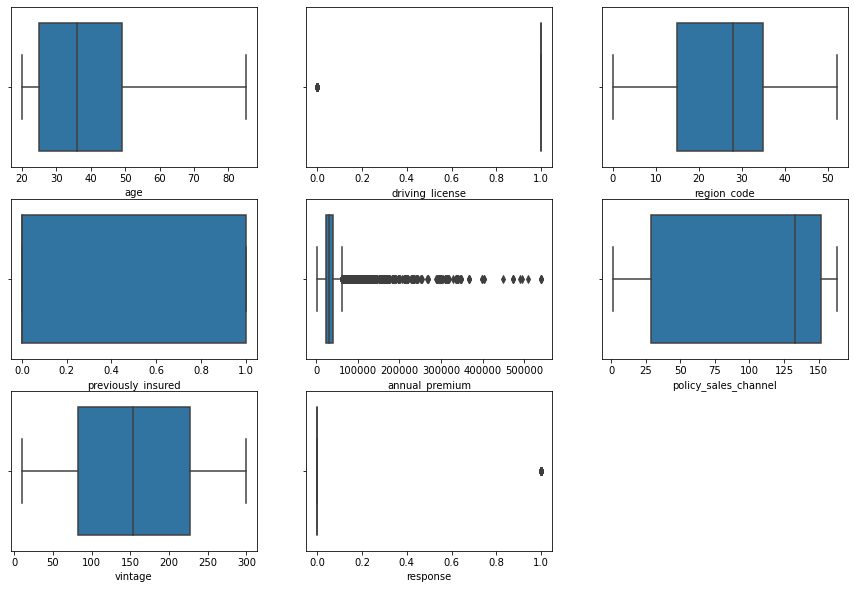

In [25]:
df_describe = df.drop(columns = ['id', 'vehicle_damage', 'gender','vehicle_age'])


plt.figure(figsize = (15, 10))
x = 1      

for column in df_describe.describe():
    plt.subplot(3,3,x)
    sns.boxplot(df[column])
    x += 1
    
# we can see that there's many outliers in this dataset in the annual premium columns
# we will be handling it by making a bin for the annual premium 
# we will not removing the outliers of annual premium since it might hold valueable information related to response 
# driving license because it's binary categorical there wouldn't be any outliers

In [27]:
## binning the annual premium into groups 

bin_premium_group = [2600, 25000, 50000, 100000, 200000, df['annual_premium'].max()]
label_bin = ['Bronze', 'Silver', 'Gold', 'Platinum', 'Diamond']

df['premium_group'] = pd.cut(df['annual_premium'], bins = bin_premium_group, labels = label_bin)
df.head()

,id,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,response,premium_group
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,Silver
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,Silver
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,Silver
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,Silver
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,Silver


In [31]:
## Binning age into Age Generation 
# Generation age based on (https://www.weforum.org/agenda/2015/09/how-different-age-groups-identify-with-their-generational-labels/)

bin_age_generation = [18, 34, 50, 69, df['age'].max()]
label_age_generation = ['Millenials', 'Gen X', 'Boomer', 'Silent']

df['Generation'] = pd.cut(df['age'], bins = bin_age_generation, labels = label_age_generation)
df.head()

,id,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,response,premium_group,Generation
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,Silver,Gen X
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,Silver,Silent
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,Silver,Gen X
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,Silver,Millenials
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,Silver,Millenials


### Exploratory Data Analysis 

#### Univariate 

In [32]:
# Gender
df.stb.freq(['gender'], cum_cols = False)

# 54 % of the customer of the health insurance is male 

,gender,count,percent
0,Male,206089,54.07613
1,Female,175020,45.92387


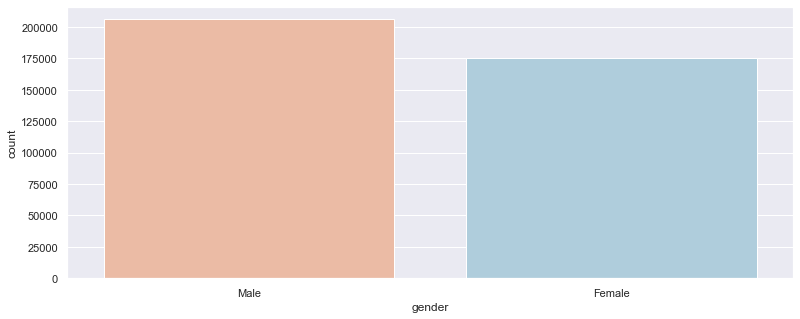

In [228]:
plt.figure(figsize = (13, 5))
sns.countplot(df['gender'], palette = 'RdBu')
plt.show()

In [34]:
df['age'].mean()

## the average age for health insurance customers is around 38 - 39

38.822583565331705

In [37]:
df.stb.freq(['driving_license'], cum_cols=False)

# almost everyone in this dataset has a driving license 

,driving_license,count,percent
0,1,380297,99.786938
1,0,812,0.213062


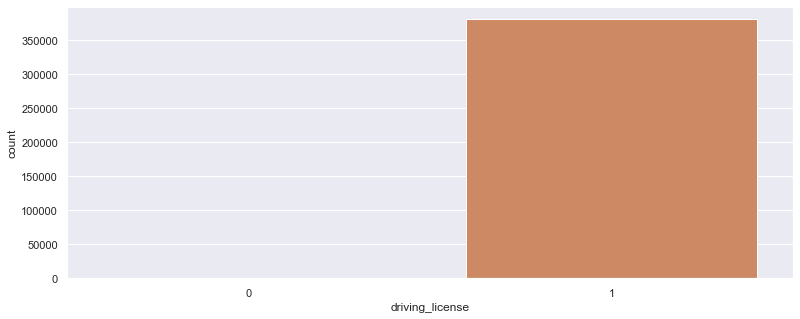

In [227]:
plt.figure(figsize = (13, 5))
sns.countplot(df['driving_license'])

In [39]:
df.stb.freq(['region_code'], cum_cols=False).head()

# region code 28 has the highest number of health insurance customers
# while region 52 has the lowest number of health insurance customers 

,region_code,count,percent
0,28.0,106415,27.922458
1,8.0,33877,8.889058
2,46.0,19749,5.181982
3,41.0,18263,4.792067
4,15.0,13308,3.491914


In [41]:
df.stb.freq(['previously_insured'], cum_cols=False).head()

# more than half of the customers does not have a vehicle insurance 

,previously_insured,count,percent
0,0,206481,54.178988
1,1,174628,45.821012


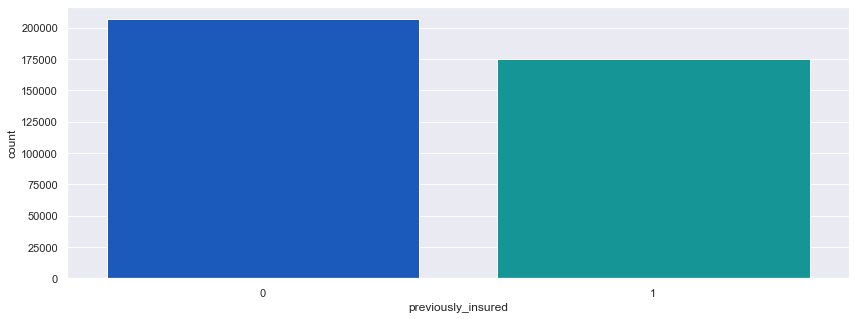

In [245]:

plt.figure(figsize = (14, 5))
sns.countplot(df['previously_insured'], palette = 'winter')


In [43]:
df.stb.freq(['vehicle_age'], cum_cols=False)

# 95 % of health insurance customers have vehichle that's less than 2 years of age 

,vehicle_age,count,percent
0,1-2 Year,200316,52.561341
1,< 1 Year,164786,43.238549
2,> 2 Years,16007,4.200111


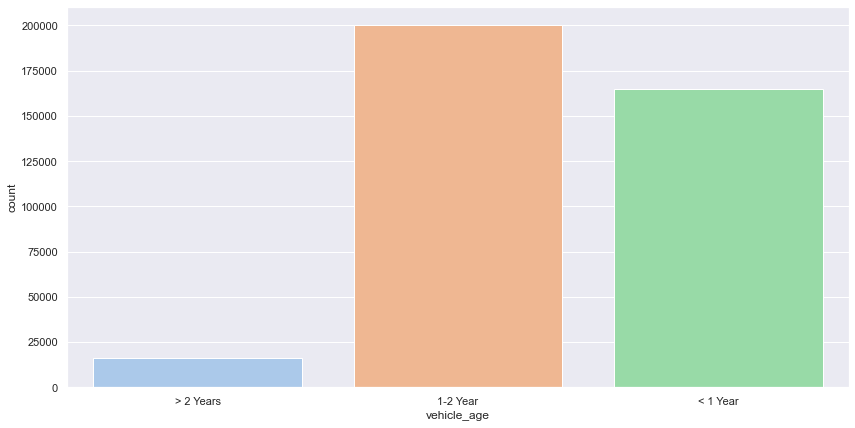

In [246]:
plt.figure(figsize = (14 ,7))
sns.countplot(df['vehicle_age'], palette = 'pastel')

In [45]:
df.stb.freq(['vehicle_damage'], cum_cols=False)

# half of the health insurance customer have had their vehicle damaged and half have not 

,vehicle_damage,count,percent
0,Yes,192413,50.487656
1,No,188696,49.512344


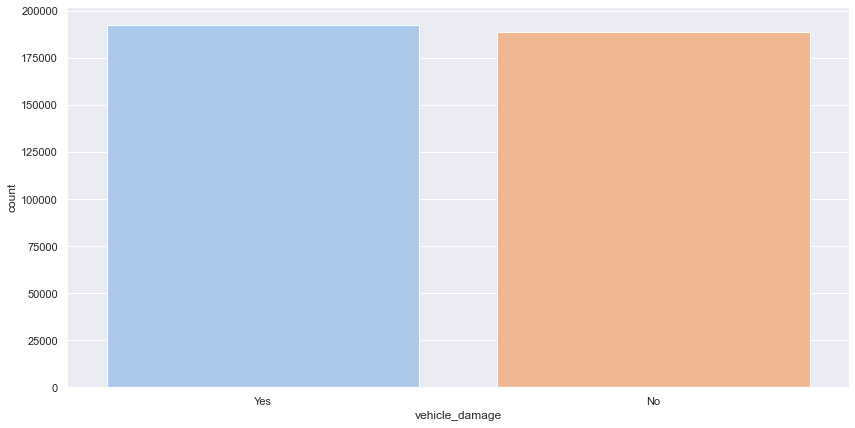

In [247]:
plt.figure(figsize = (14 ,7))
sns.countplot(df['vehicle_damage'], palette = 'pastel')

In [49]:
df.stb.freq(['policy_sales_channel'], cum_cols=False).head()

## sales channel 152 have the most success selling health insurance product 

,policy_sales_channel,count,percent
0,152.0,134784,35.366260
1,26.0,79700,20.912652
2,124.0,73995,19.415705
3,160.0,21779,5.714638
4,156.0,10661,2.797362


In [51]:
df.stb.freq(['response'], cum_cols=False).head()

# only 12 percent that's interested in buying vehicle insurance 

,response,count,percent
0,0,334399,87.743664
1,1,46710,12.256336


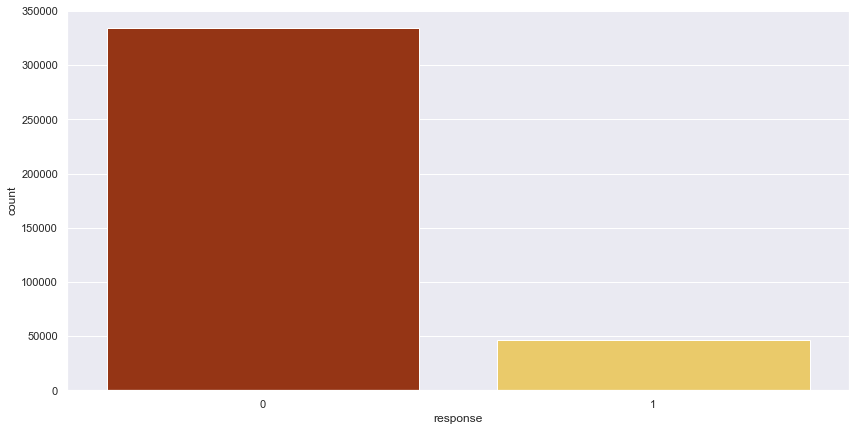

In [249]:
plt.figure(figsize = (14 ,7))
sns.countplot(df['response'], palette = 'afmhot')

In [53]:
df.stb.freq(['premium_group'], cum_cols=False).head()

# silver premium seems to be the most popular among health insurance customers 
# Premium Group 
    # Bronze : 2600 - 25000
    # Silver = 25001 - 50000
    # Gold = 50001 - 100000
    # Platinum = 100001 - 200000
    # Diamond = 200001 >
    

    # there's only a few customers that has platinum and diamond premium

,premium_group,count,percent
0,Silver,247942,65.058028
1,Bronze,100963,26.491896
2,Gold,31426,8.245935
3,Platinum,666,0.174753
4,Diamond,112,0.029388


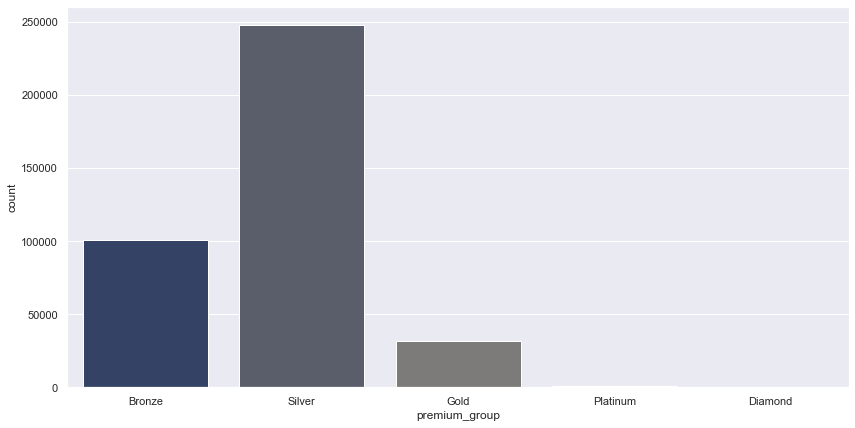

In [250]:
plt.figure(figsize = (14 ,7))
sns.countplot(df['premium_group'], palette = 'cividis')

In [56]:
df.stb.freq(['Generation'], cum_cols=False).head()

# the older generation are less likely to have a health insurance 
# Millenial generation are the highest customer of health insurance 
# Generation Group :
    # Millenials : 18 - 34
    # Gen X : 35 - 50
    # Boomer : 51 - 69
    # Silent : 70 and Above
    
    


,Generation,count,percent
0,Millenials,181876,47.722830
1,Gen X,110689,29.043922
2,Boomer,70794,18.575788
3,Silent,17750,4.657460


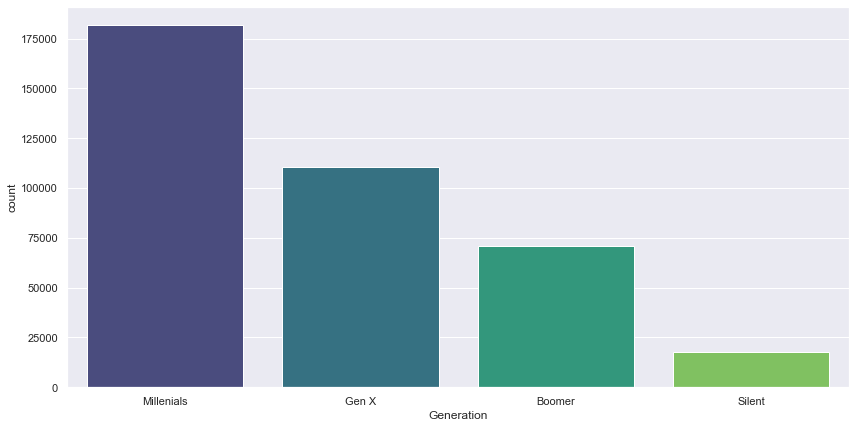

In [251]:
plt.figure(figsize = (14 ,7))
sns.countplot(df['Generation'], palette = 'viridis')

In [57]:
df.head()

,id,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,response,premium_group,Generation
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,Silver,Gen X
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,Silver,Silent
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,Silver,Gen X
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,Silver,Millenials
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,Silver,Millenials


### Multivariate 

since our target column is response first we are going to crosstab the response column with all the feature before we dig deeper to other analysis

In [64]:
## gender and response 

pd.crosstab(index = df['response'], columns = df['gender'], normalize = 'index')

## male are more likely  to be interested to vehicle insurance compared to women
## 61% of interested response are from male respondents

gender,Female,Male
response,,
0,0.469006,0.530994
1,0.389317,0.610683


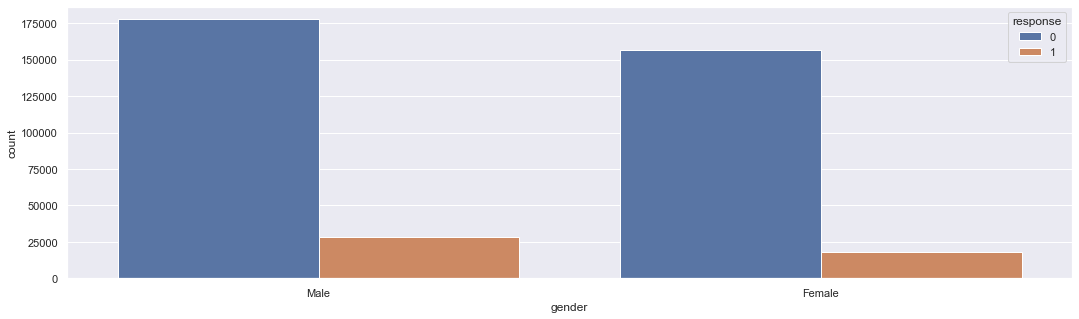

In [159]:
plt.figure(figsize = (18, 5))
sns.countplot(df['gender'], hue = df['response'])
plt.show()

In [65]:
### average age and response

pd.crosstab(index = df['response'], columns = 'Average Age', values = df['age'], aggfunc='mean')

# the average age of customer who is interested with vehicle insurance is 43 years old 
# while for customers who's not interested are 38 yo
# this might show that younger customers are not interested with vehicle insurance

col_0,Average Age
response,
0,38.178227
1,43.435560


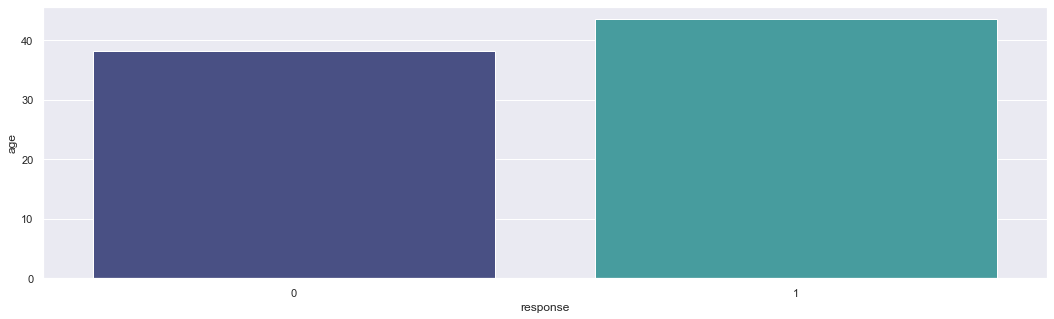

In [175]:
plt.figure(figsize = (18, 5))
sns.barplot(x = df['response'], y = df['age'], palette = 'mako', ci = False)
plt.show()

In [176]:
### average age and Previously Insured

pd.crosstab(index = df['previously_insured'], columns = 'Average Age', values = df['age'], aggfunc='mean')

# The Average age of customer that has a vehicle insurance is 34.5 
# and the average age of customer that does not have a vehicle insurance is 42.4

# this tells that young customer will probably have a vehicle insurance compared to the older customers

col_0,Average Age
previously_insured,
0,42.45564
1,34.52684


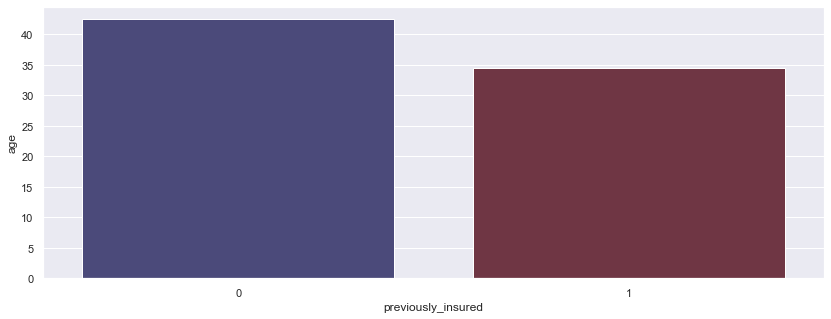

In [177]:
plt.figure(figsize = (14, 5))
sns.barplot(x = df['previously_insured'], y = df['age'], palette = 'icefire', ci = False)
plt.show()

In [69]:
pd.crosstab(index = df['response'], columns = df['previously_insured'], normalize = 'columns')

# almost every customer who already have a vehicle insurance is not interested with another vehicle insurance
# out of all customer who does not have a vehicle insurance almost a quarter of them are intersted with vehicle insurance

previously_insured,0,1
response,,
0,0.774546,0.999095
1,0.225454,0.000905


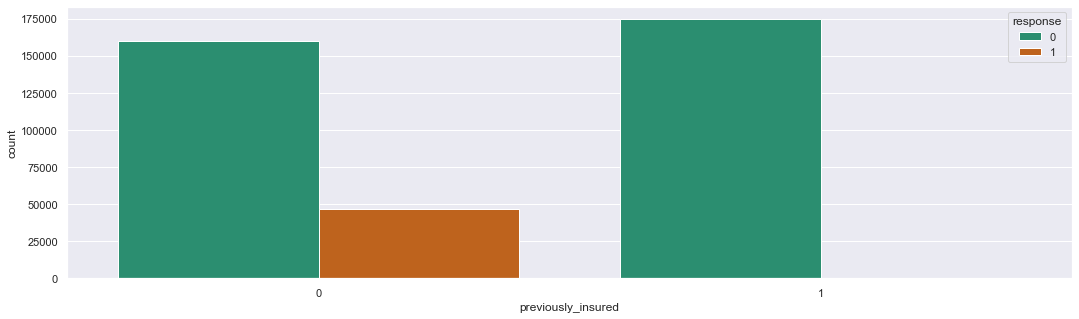

In [166]:
plt.figure(figsize = (18, 5))
sns.countplot(df['previously_insured'], hue = df['response'], palette = 'Dark2')
plt.show()

In [254]:
pd.crosstab(index = df['response'], columns = df['vehicle_age'], normalize = 'columns')

# from the vehicle age group customer who has a newer vehicle are less likely to be interested with vehicle insurance
# customer who has a vehicle that's older than 2 years are more likely to be interested to vehicle insurance 

vehicle_age,1-2 Year,< 1 Year,> 2 Years
response,,,
0,0.826245,0.956295,0.706254
1,0.173755,0.043705,0.293746


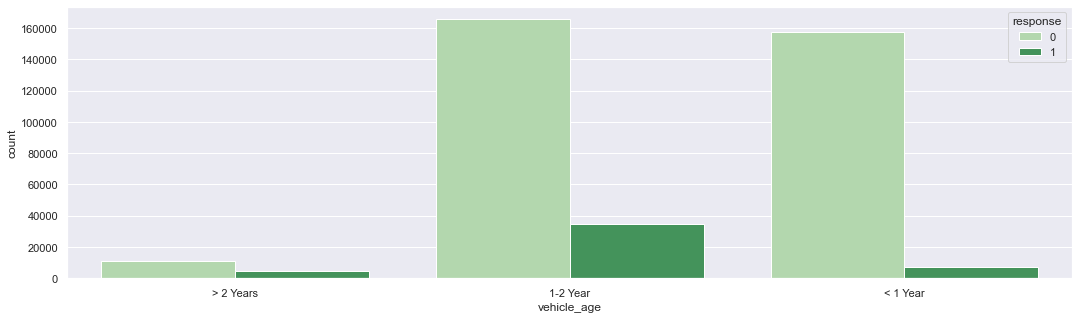

In [171]:
plt.figure(figsize = (18, 5))
sns.countplot(df['vehicle_age'], hue = df['response'], palette = 'Greens')
plt.show()

In [252]:
pd.crosstab(index = df['previously_insured'], columns = df['vehicle_age'], normalize = 'columns')

# the newer the vehicle the more likely it's insured 
# this columns below showed that 66.3% of car aged 1 or below are insured

vehicle_age,1-2 Year,< 1 Year,> 2 Years
previously_insured,,,
0,0.67389,0.336976,0.997126
1,0.32611,0.663024,0.002874


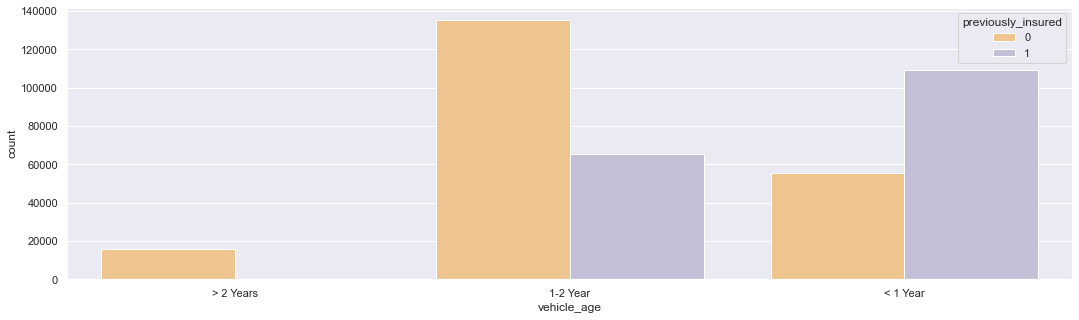

In [173]:
plt.figure(figsize = (18, 5))
sns.countplot(df['vehicle_age'], hue = df['previously_insured'], palette = 'PuOr')
plt.show()

In [255]:
pd.crosstab(index = df['response'], columns = [df['vehicle_age'], df['previously_insured']], normalize = 'columns')

# customer who has a  newer car are more likely to have their vehicle insured
# this could be an insight that insurance company needs to work with a dealership
    # to have a bundling product of vehicle & insurance
    


vehicle_age         1-2 Year            < 1 Year           > 2 Years          
previously_insured         0         1         0         1         0         1
response                                                                      
0                   0.742864  0.998546  0.871419  0.999433   0.70547  0.978261
1                   0.257136  0.001454  0.128581  0.000567   0.29453  0.021739

In [83]:
pd.crosstab(index = df['response'], columns = df['vehicle_damage'], normalize = 'index')

## customer who're intersted with vehicle insurance 98% have had a vehicle damage in the past

vehicle_damage,No,Yes
response,,
0,0.561347,0.438653
1,0.021023,0.978977


In [256]:
pd.crosstab(index = df['response'], columns = df['vehicle_damage'], normalize = 'columns')


vehicle_damage,No,Yes
response,,
0,0.994796,0.762345
1,0.005204,0.237655


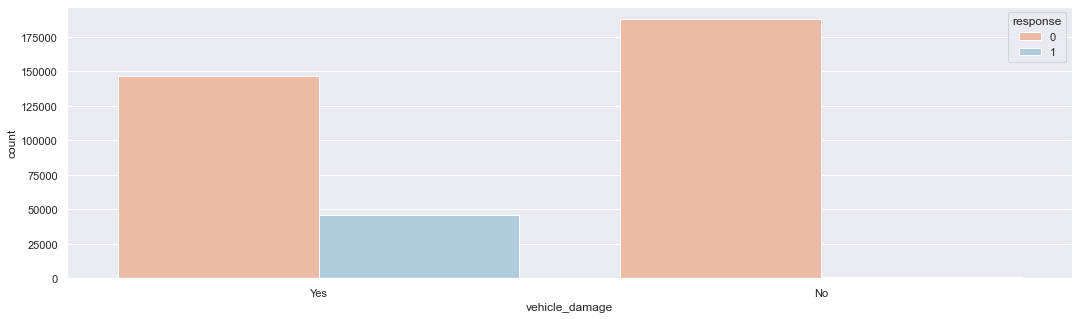

In [180]:
plt.figure(figsize = (18, 5))
sns.countplot(df['vehicle_damage'], hue = df['response'], palette = 'RdBu')
plt.show()

In [86]:
pd.crosstab(index = df['previously_insured'], columns = df['vehicle_damage'], normalize = 'columns')

# almost 95 % customer who have had their vehicle previously damaged doesn't have a vehicle insurance
# while 87 % of customer who had never have any vehicle damaged have a vehicle insurance

# People who have vehicle insurance are more likely to be careful to their vehicle

vehicle_damage,No,Yes
previously_insured,,
0,0.127136,0.948434
1,0.872864,0.051566


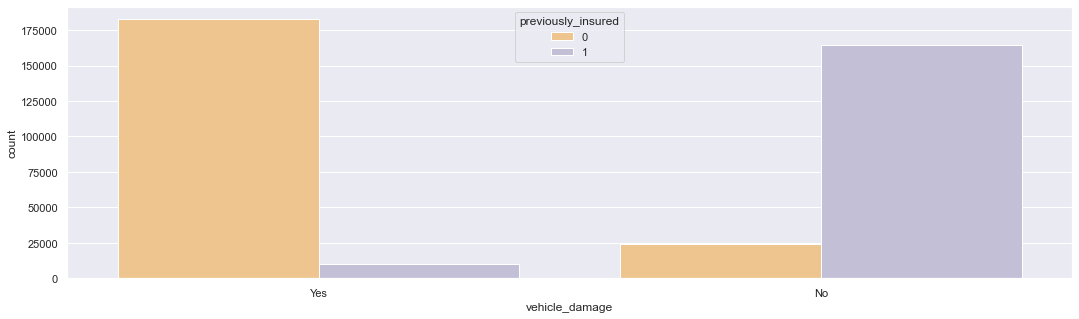

In [178]:
plt.figure(figsize = (18, 5))
sns.countplot(df['vehicle_damage'], hue = df['previously_insured'], palette = 'PuOr')
plt.show()

In [184]:
pd.crosstab(index = df['vehicle_age'], columns = df['vehicle_damage'], normalize = 'index')

# cars that's more than 2 years of age are the most likely to have had a vehicle damage 
# the younger the vehicle the less likely that the vehicle has a vehicle damage

vehicle_damage,No,Yes
vehicle_age,,
1-2 Year,0.359886,0.640114
< 1 Year,0.707524,0.292476
> 2 Years,0.000937,0.999063


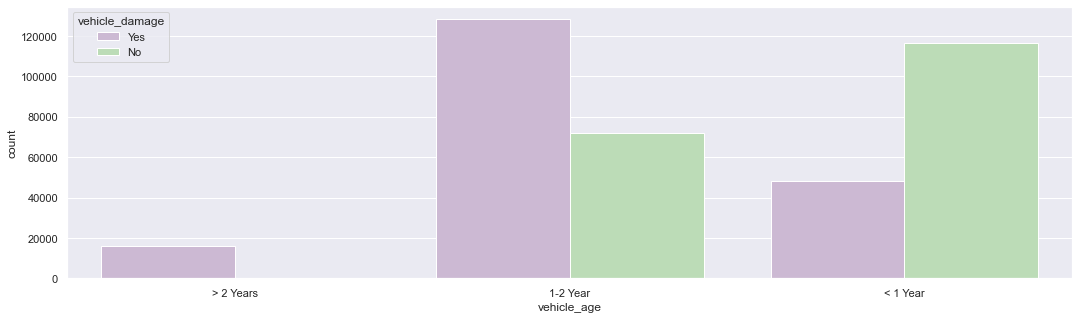

In [183]:
plt.figure(figsize = (18, 5))
sns.countplot(df['vehicle_age'], hue = df['vehicle_damage'], palette = 'PRGn')
plt.show()

In [89]:
pd.crosstab(index = df['response'], columns = [df['vehicle_damage'], df['previously_insured']], normalize = 'index')

# customer who never had any vehicle damage and has a vehicle insurance are the most likely not interested in another vehicle insurance
# from all the customer who is interested 97% of them does not have vehicle insurance and had a vehicle damage in the past

# targeting customer who does not have a vehicle insurance and have had a vehicle damage in the past

vehicle_damage            No                 Yes          
previously_insured         0         1         0         1
response                                                  
0                   0.069019  0.492328  0.409239  0.029414
1                   0.019482  0.001541  0.977136  0.001841

In [91]:
pd.crosstab(index = df['response'], columns = 'Median Premium', values = df['annual_premium'], aggfunc='median')

# the median of customer premium doesn't really differentitate of the responses

col_0,Median Premium
response,
0,31504.0
1,33002.0


In [93]:
pd.crosstab(index = df['response'], columns = 'Average Vintage', values = df['vintage'], aggfunc='median')

# customer loyalty doesn't have any effect on the response towards vehicle insurance

col_0,Average Vintage
response,
0,154
1,154


In [97]:
pd.crosstab(index = df['response'], columns = df['premium_group'], normalize = 'columns')

# the more expensive the premium group the more likely the customer are interested with the vehicle insurance

# Assumption:
    #Customer who has more expensive premium group are more likely have a higher income
    #The higher the income the more likely they have money to spend 

premium_group,Bronze,Silver,Gold,Platinum,Diamond
response,,,,,
0,0.882918,0.879044,0.848024,0.848348,0.803571
1,0.117082,0.120956,0.151976,0.151652,0.196429


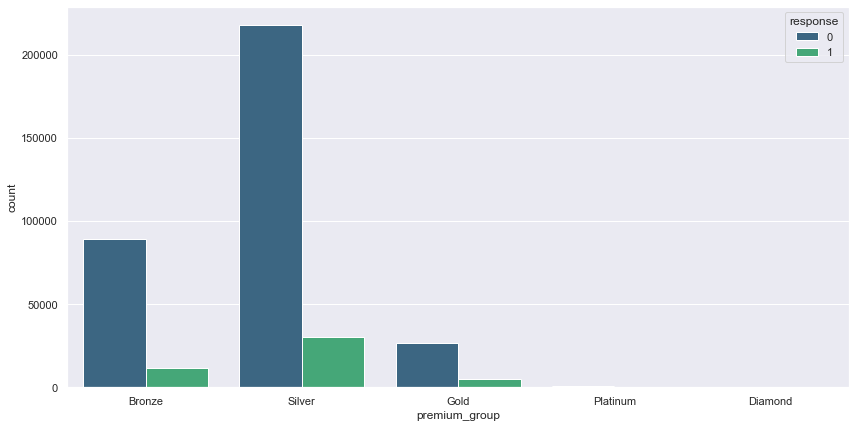

In [229]:
plt.figure(figsize = (14, 7))
sns.countplot(df['premium_group'], hue = df['response'], palette = 'viridis')

# eventhough platinum and diamond has a higher percentage of intersted responds, however there're only few numbers of customers
# are in those premium_group

In [102]:
pd.crosstab(index = df['response'], columns = [df['premium_group'], df['previously_insured']], normalize = 'columns')

# for customer who does not have vehicle insurance before :
    # the more expensive the premium group the more likely the customer are interested with the vehicle insurance
    
# while for customer who's previously have vehicle insurance :
    # the more expensive the group the less likely they will sign 


premium_group         Bronze              Silver                Gold  \
previously_insured         0         1         0         1         0   
response                                                               
0                   0.791091  0.998879  0.771191  0.999148  0.749921   
1                   0.208909  0.001121  0.228809  0.000852  0.250079   

premium_group                 Platinum        Diamond       
previously_insured         1         0    1         0    1  
response                                                    
0                   0.999353  0.720994  1.0  0.706667  1.0  
1                   0.000647  0.279006  0.0  0.293333  0.0

In [104]:
pd.crosstab(index = df['response'], columns = [df['premium_group'], df['vehicle_damage']], normalize = 'columns')


premium_group     Bronze              Silver                Gold            \
vehicle_damage        No       Yes        No       Yes        No       Yes   
response                                                                     
0               0.991645  0.779109  0.995756  0.758805  0.997425  0.739765   
1               0.008355  0.220891  0.004244  0.241195  0.002575  0.260235   

premium_group  Platinum           Diamond            
vehicle_damage       No       Yes      No       Yes  
response                                             
0               0.99373  0.714697     1.0  0.681159  
1               0.00627  0.285303     0.0  0.318841

In [108]:
## generation and response

pd.crosstab(index = df['response'], columns = df['Generation'], normalize = 'columns')


# Millenials shown to be the generation that's less likely to be intersted in vehicle insurance 
    # whyy???
# Gen X and Boomer are 2 generation that's most likely to be interested with vehicle insurance

Generation,Millenials,Gen X,Boomer,Silent
response,,,,
0,0.938788,0.78614,0.85075,0.924563
1,0.061212,0.21386,0.14925,0.075437


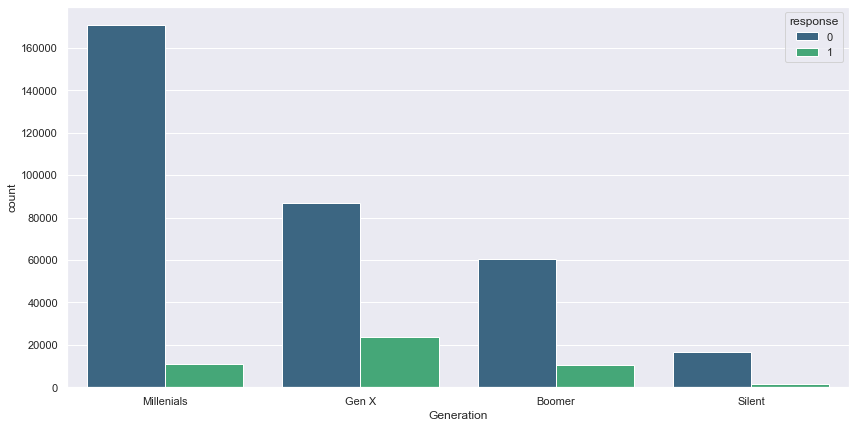

In [139]:
plt.figure(figsize = (14, 7))
sns.countplot(df['Generation'], hue = df['response'], palette = 'viridis')

In [148]:
pd.crosstab(index = df['Generation'], columns = [df['vehicle_damage'], df['response']], normalize = 'columns')

# Out of all customers that have had vehicle damage in the past Gen X are more likely to response interested to vehicle insurance

vehicle_damage        No                 Yes          
response               0         1         0         1
Generation                                            
Millenials      0.645780  0.503055  0.337601  0.232658
Gen X           0.187306  0.373727  0.353526  0.509644
Boomer          0.128424  0.112016  0.246249  0.228656
Silent          0.038489  0.011202  0.062624  0.029041

In [258]:
pd.crosstab(index = df['Generation'], columns = df['vehicle_damage'], normalize = 'index')

# Gen X in generation with the highest vehicle damage percentage 

vehicle_damage,No,Yes
Generation,,
Millenials,0.669225,0.330775
Gen X,0.320962,0.679038
Boomer,0.342077,0.657923
Silent,0.407662,0.592338


In [143]:
pd.crosstab(index = df['Generation'], columns = df['previously_insured'], normalize = 'index')

# this shows that maybe why millenial is not interested in vehicle insurance is because 62.7 % of millenials already have vehicle insurance
# the shows that Gen X generation the less likely they have a vehicle insurance before 

previously_insured,0,1
Generation,,
Millenials,0.372012,0.627988
Gen X,0.720279,0.279721
Boomer,0.681428,0.318572
Silent,0.611437,0.388563


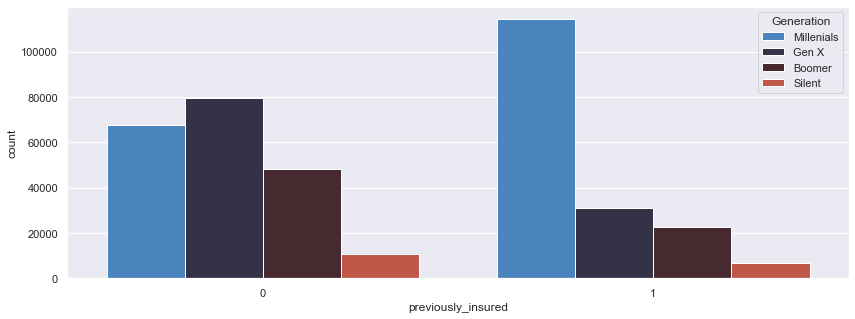

In [142]:

plt.figure(figsize = (14, 5))
sns.countplot(x = df['previously_insured'], hue = df['Generation'], palette = 'icefire')
plt.show()


In [115]:
pd.crosstab(index = df['response'], columns = [df['Generation'], df['previously_insured']], normalize = 'index')

# this table below shows that millenial who has a vehicle insurance are most likely not to be interested in vehicle insurance 

Generation         Millenials               Gen X              Boomer  \
previously_insured          0         1         0         1         0   
response                                                                
0                    0.169271  0.341326  0.167826  0.092393  0.112704   
1                    0.236694  0.001648  0.505374  0.001413  0.225926   

Generation                      Silent            
previously_insured         1         0         1  
response                                          
0                   0.067405  0.028457  0.020619  
1                   0.000278  0.028623  0.000043

In [185]:
pd.crosstab(index = df['Generation'], columns = df['vehicle_age'], normalize = 'index')

# majority of millenials 90.1% have a vehicle age below one year, and from our analysis before majority of vehicle 
# that's less then 1 year of age is already insured

# there's less than one percent of millenials who has cars over 2 years

# this open up on how to target millenial customers by working with a dealership that sells new car, and bundling it with
    # an insurance product to get the millenial generation market 
    
# and since lmost 94% millenials says they're not interested with vehicle insurance product this kind of partnership with dealer
# will catch the market of millenial that we're missing

vehicle_age,1-2 Year,< 1 Year,> 2 Years
Generation,,,
Millenials,0.097539,0.901339,0.001122
Gen X,0.940816,0.005095,0.054088
Boomer,0.886332,0.003757,0.109910
Silent,0.884000,0.001352,0.114648


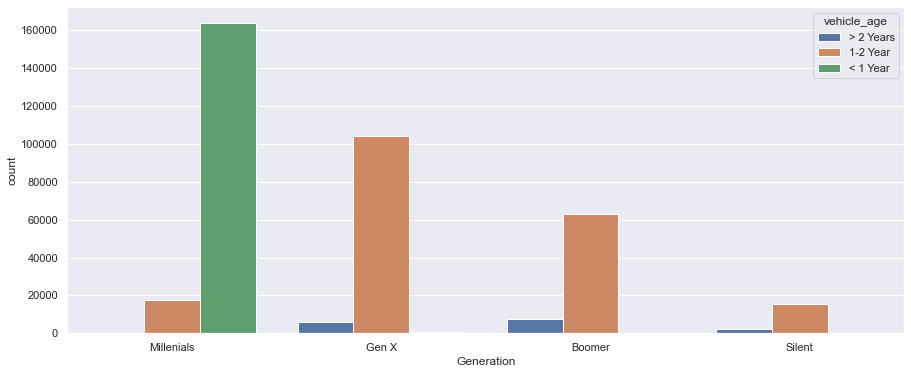

In [129]:
plt.figure(figsize = (15, 6))
sns.countplot(df['Generation'], hue = df['vehicle_age'])
plt.show()

In [222]:
## Sales Channel


pd.crosstab(index = df['policy_sales_channel'], columns = df['response'], normalize = 'columns').sort_values(1, ascending = False).head()

# the policy sales channel no 26 and policy sales channel number 124 are the 2 highest percentage of interested response
# there's no further explanataion on what are this number  :(

response,0,1
policy_sales_channel,,
26.0,0.190817,0.340206
124.0,0.179423,0.299636
152.0,0.391526,0.082595
156.0,0.025012,0.049176
157.0,0.014623,0.038407


In [223]:
## Most ineffective sales channel

pd.crosstab(index = df['policy_sales_channel'], columns = df['response'], normalize = 'columns').sort_values(0, ascending = False).head()

# of all sales channel, policy sales channel number 152 seems to be the least effective to offer health insurance customers
# a vehicle insurance 

response,0,1
policy_sales_channel,,
152.0,0.391526,0.082595
26.0,0.190817,0.340206
124.0,0.179423,0.299636
160.0,0.063708,0.010169
156.0,0.025012,0.049176


In [201]:
## Region 

top_5_region =  pd.crosstab(index = df['region_code'], columns = df['response']).sort_values(1, ascending = False).head()
top_5_region

# region 28 has the highest number of customers of all region that's maybe why it has the the highest number of interested response
# the region 28 has the highest percentage of customers who is interested with vehicle insurance product 
# unfortunately  there's no explanation on each number of region of which is where 

response,0,1
region_code,,
28.0,86498,19917
8.0,30620,3257
41.0,16039,2224
46.0,17717,2032
29.0,9700,1365


In [219]:
pd.crosstab(index = df['region_code'], columns = df['response'], normalize = 'index').sort_values(1, ascending = False).head()


# if we compared region to region interested rate, region 38 has the highest percentage of interested 
# while region 28 is on the 2nd place 

response,0,1
region_code,,
38.0,0.807996,0.192004
28.0,0.812837,0.187163
19.0,0.837134,0.162866
4.0,0.841755,0.158245
23.0,0.846939,0.153061


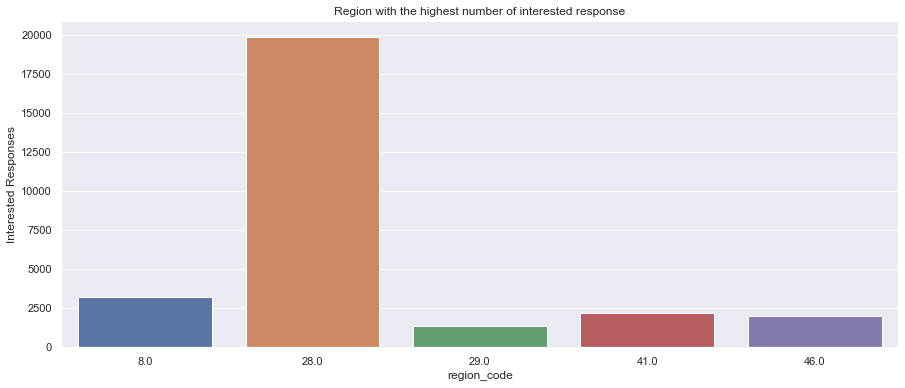

In [213]:
plt.figure(figsize = (15, 6))

sns.barplot(x = top_5_region.index, y = top_5_region[1])
plt.ylabel('Interested Responses')
plt.title('Region with the highest number of interested response')
plt.show()

# Conclusion 



- From this dataset of health insurance customers almost **95%** of customers have a vehicle age that's less than 2 years. from our analysis, customers who has more than 2 years of vehicle age are more interested with vehicle insurance advertisment, while customers who has less then one year of vehicle age, only **4%** of them are actually interesred with vehicle insurance 


- We found out that customer who already have vehicle insurance are almost have no interest in another vehicle insurance. Our analysis shows that **99.9% of customers that have a vehicle insurance is not interested in another vehicle insurance**, while customer who doesn't have a vehicle insurance **22.5 %** of them are interested with vehicle insurance


- we also found out that a newer vehicle are more likely to have a vehicle insurance, with vehicle that's less than one year **66% of those are insured** , vehicle that's older than one year but less than 2 years are **33% insured**,  while less than **one percent** of vehicle that's older than 2 years are insured. This should explain why customer who owns a newer vehicle are less likely to be intersted with insurance promotion, because they probably alredy have one.


- **Customers who never had vehicle damaged** only 0.5 % of those customers are intersted with vehicle insurance, **87%** of customers who never had any vehicle damaged already have a vehicle insurance


- **Which Customer Generation are less likely to be intersted with vehicle insurance** the answer is **Millenials** (people in age group of 18 - 34) only **6% of millenials are actually interested with vehicle insurance**, and why is so? 
    1. almost **63% of millenials already have vehicle insurance**, from our analysis before owning vehicle insurance is a major factor why someone is not interested with another vehicle insurance
    
    2. **90% of millenials have a vehicle that's less than one year of age**, and from our analysis before that vehicle that's less than one year are **66% already insured**

This conculed that millenials are more likely to already have a vehicle insurance before our vehicle insurance team approached, and that's a major factor why millenials are least likely to be interested with our vehicle insurance, because they already have one


#### So who's actually interested with our vehicle insurance ? 

From the responses there are **12 % of our health insurance customers are interested with the vehicle insurance product** but who are those people?

1. **First, Customer who does not have a a vehicle insurance**, out of all customers who does not have a vehicle insurance  **22.5 %** of them says that they're interested with vehicle insurance product


2. **customers who has vehicle that's older than 2 years** our analysis before mentioned that only less than **one percent** of car that's older than 2 years are previouly insured, by not having a vehicle insurance they're more likely to be intersted with our vehicle insurance, our data show's that customer who has car that's more than 2 years are **7 times** more likely to be intersted with vehicle insurance compared to customer who own a vehicle less than one year


3. **customers who have had a vehicle damaged in the past** from our analysis we found out that **97%** customers who actually intersted with vehicle insurance have had their vehicle damaged in the past
    1. **95 % of customers who have had vehicle damage in the past still doesn't have a vehicle insurance**
    

**Which Customer Generation that's most likely to be interested in Vehicle insurance ?**
   - **GEN X** (Age Gen X : 35 - 50)
       - our analysis shows that GEN X has the highest percentage to be intersteed with vehicle insurance, to be precise, **21 %** of GEN X are interested with vehicle insurance 
       
       - This might be because **72% GEN X** does not have a vehicle insurace, and GEN X has the highest percentage of vehicle damager the past **(67%)** among other generation



<b>Machine learning could predict whether a customer would be interested or not towards vehicle insurance product with recall 0.965 out of 1</b>

Using logiistic regression that has been tuned, we focus more on recall instead of accuracy here because of we want to reduce the false negative ( The customer who actually interested but the model predicted that customer is not intrested). Since this kind of problem could lead into lost of potential revenue

## Recommendation



### 1. Work with dealership to capture millenial market


as we know from the analysis that millenials are less likely to be intersted with vehicle insurance because of most of them have a vehicle that's less than one year of age, and vehicle with less then one year of age are most likely to be insured so in conclution they already have one, and so they're not interested. By working together with a dealership that sells a brand new car, we could tackle this problem, our insurance company could have a bundling product of brand new vehicle and a free promotional vehicle insurance for certain period of months. we hope that by working together with vehicle dealership we could target more millenials customers.

### 2. Target & Educate Customers Who had Vehicle Damage in the past

**95%** customers who have had a vehicle damaged in the past still does not have a vehicle insurance this is a gold mine for our vehicle insurance, since customers are more likely to be interested in vehicle insurance if they've a vehicle damage in the past. 


 we could to a targeted marketing to this customers, by showing the benefits of having a vehicle insurance and how it will protect you if you ever had a vehicle damaged in the future


### 3. Benfits for customer who has a vehicle that's more than 2 years

having an older vehicle means having more problem compared to newer vehicle, problems like overheating, radiator problem and, etc are common with older cars, fixing those kind of stuff could be costly or having problem like that in the middle of a road could be troublesome. **Since only less than one percent** of customer who's actually owned car that's older than 2 years and insured, we could focus more on the problems that car over two years might have and the pain point of customers that owned older car and we should construct the benefits on those pain points, since **customer with vehicle age over 2 years** are the most likely to be intersted with vehicle insurance



### 4. Use Machine Learning Algorith to have predict the response outcome of a customer

Using the Logistic regression machine learning that has recall of 96.5 % will speed up and find out which customer who actually intersted in vehicle insurance, and we could focus our resource just based on the customers that's interested